In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

snscolors = sns.color_palette("colorblind")

In [2]:
from cosmicfishpie.fishermatrix import cosmicfish
from cosmicfishpie.utilities.utils import printing as upt
upt.debug = False
upt.debug_print("Debug is on")

In [3]:
fiducial = {
    "Omegam": 0.32,
    "Omegab": 0.05,
    "h": 0.67,
    "ns": 0.96,
    "sigma8": 0.815584,
    "w0": -1.0,
    "wa": 0.0,
    "mnu": 0.06,
    "Neff": 3.044,
}

options = {
    "accuracy": 1,
    "feedback": 1,
    "code": "symbolic",
    "outroot": "GCsp_presentation",
    "survey_name": "SKAO",
    #"survey_name_spectro": "SKAO-Spectroscopic-Redbook",
    "survey_name_spectro": "Euclid-Spectroscopic-ISTF-Pessimistic-sigma_pv",
    "survey_name_photo": False,
    "survey_name_radio_IM": "SKAO-IM-Redbook",
    'specs_dir': '../cosmicfishpie/configs/other_survey_specifications/',
    "cosmo_model": "LCDM",
    "bfs8terms": False,
}

In [4]:
observables = ["GCsp", "IM"]
cosmoFM_A = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    observables=observables,
    cosmoModel=options["cosmo_model"],
    surveyName=options["survey_name"],
)

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************

  -> Survey loaded:  SKAO-IM-Redbook

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic-sigma_pv

  -> No photo survey passed, returning empty dict

  -> Survey loaded:  False

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   0.11 s


# Spectroscopic Power Spectrum

In [5]:
cosmoFM_A.freeparams

{'Omegam': 0.01,
 'Omegab': 0.01,
 'h': 0.01,
 'ns': 0.01,
 'sigma8': 0.01,
 'lnbg_1': 0.0001,
 'lnbg_2': 0.0001,
 'lnbg_3': 0.0001,
 'lnbg_4': 0.0001,
 'bI_c1': 0.0001,
 'bI_c2': 0.0001}

In [6]:
from cosmicfishpie.LSSsurvey import spectro_obs as spobs
from cosmicfishpie.LSSsurvey import spectro_cov as spcov

spectro_Pk = spobs.ComputeGalSpectro(cosmoFM_A.fiducialcosmopars)
spectro_Cov = spcov.SpectroCov(cosmoFM_A.fiducialcosmopars, 
                               fiducial_specobs=spectro_Pk)

In [7]:
spectro_Pk.observables

['GCsp', 'IM']

In [8]:
if "IM" in spectro_Pk.observables:
    print(f"IM zbins: {spectro_Pk.nuisance.IM_zbins}")
    print(f"IM zbins mids: {spectro_Pk.nuisance.IM_zbins_mids}")
    print(f"IM bias pars: {spectro_Pk.IMbiaspars}")

IM zbins: [0.5 0.7 0.9 1.1 1.3 1.5 1.8 2.  2.2 2.4 2.6]
IM zbins mids: [0.6  0.8  1.   1.2  1.4  1.65 1.9  2.1  2.3  2.5 ]
IM bias pars: {'bI_c1': 0.3, 'bI_c2': 0.6}


In [9]:
if "GCsp" in spectro_Pk.observables:
    print(f"GCsp zbins: {spectro_Pk.nuisance.sp_zbins}")
    print(f"GCsp zbins mids: {spectro_Pk.nuisance.sp_zbins_mids}")
    print(f"GCsp bias pars: {spectro_Pk.spectrobiaspars}")

GCsp zbins: [0.9 1.1 1.3 1.5 1.8]
GCsp zbins mids: [1.   1.2  1.4  1.65]
GCsp bias pars: {'lnbg_1': 0.37944989, 'lnbg_2': 0.4738057, 'lnbg_3': 0.55760176, 'lnbg_4': 0.64125687}


In [10]:
print(f"GC non-linear pars: {spectro_Pk.spectrononlinearpars}")
print(f"GC Pshot pars: {spectro_Pk.PShotpars}")

GC non-linear pars: {}
GC Pshot pars: {}


In [11]:
all_z_bins = np.concatenate([spectro_Pk.nuisance.sp_zbins_mids, spectro_Pk.nuisance.IM_zbins_mids])

In [12]:
for zz in all_z_bins:
    print(f"GCsp bias term at z={zz:.2f}: ", spectro_Pk.bterm_fid(zz, bias_sample="g"))
    print(f"IM bias term at z={zz:.2f}: ", spectro_Pk.bterm_fid(zz, bias_sample="I"))


GCsp bias term at z=1.00:  1.4614803932771856
IM bias term at z=1.00:  1.2
GCsp bias term at z=1.20:  1.606094892470849
IM bias term at z=1.20:  1.26
GCsp bias term at z=1.40:  1.7464789980013922
IM bias term at z=1.40:  1.3199999999999998
GCsp bias term at z=1.65:  1.89886600781197
IM bias term at z=1.65:  1.395
GCsp bias term at z=0.60:  1.4614803932771856
IM bias term at z=0.60:  1.08
GCsp bias term at z=0.80:  1.4614803932771856
IM bias term at z=0.80:  1.1400000000000001
GCsp bias term at z=1.00:  1.4614803932771856
IM bias term at z=1.00:  1.2
GCsp bias term at z=1.20:  1.606094892470849
IM bias term at z=1.20:  1.26
GCsp bias term at z=1.40:  1.7464789980013922
IM bias term at z=1.40:  1.3199999999999998
GCsp bias term at z=1.65:  1.89886600781197
IM bias term at z=1.65:  1.395
GCsp bias term at z=1.90:  1.89886600781197
IM bias term at z=1.90:  1.47
GCsp bias term at z=2.10:  1.89886600781197
IM bias term at z=2.10:  1.5299999999999998
GCsp bias term at z=2.30:  1.8988660078119

#### Compute the observed power spectrum at different redshifts and different angles 

In [13]:
kk = spectro_Pk.k_grid
zz= all_z_bins

In [14]:
spectro_Pk.Temperature(zz)

array([0.17057226, 0.19456428, 0.21831147, 0.24772251, 0.12182797,
       0.14631201, 0.17057226, 0.19456428, 0.21831147, 0.24772251,
       0.27691885, 0.30017661, 0.32338268, 0.34656355])

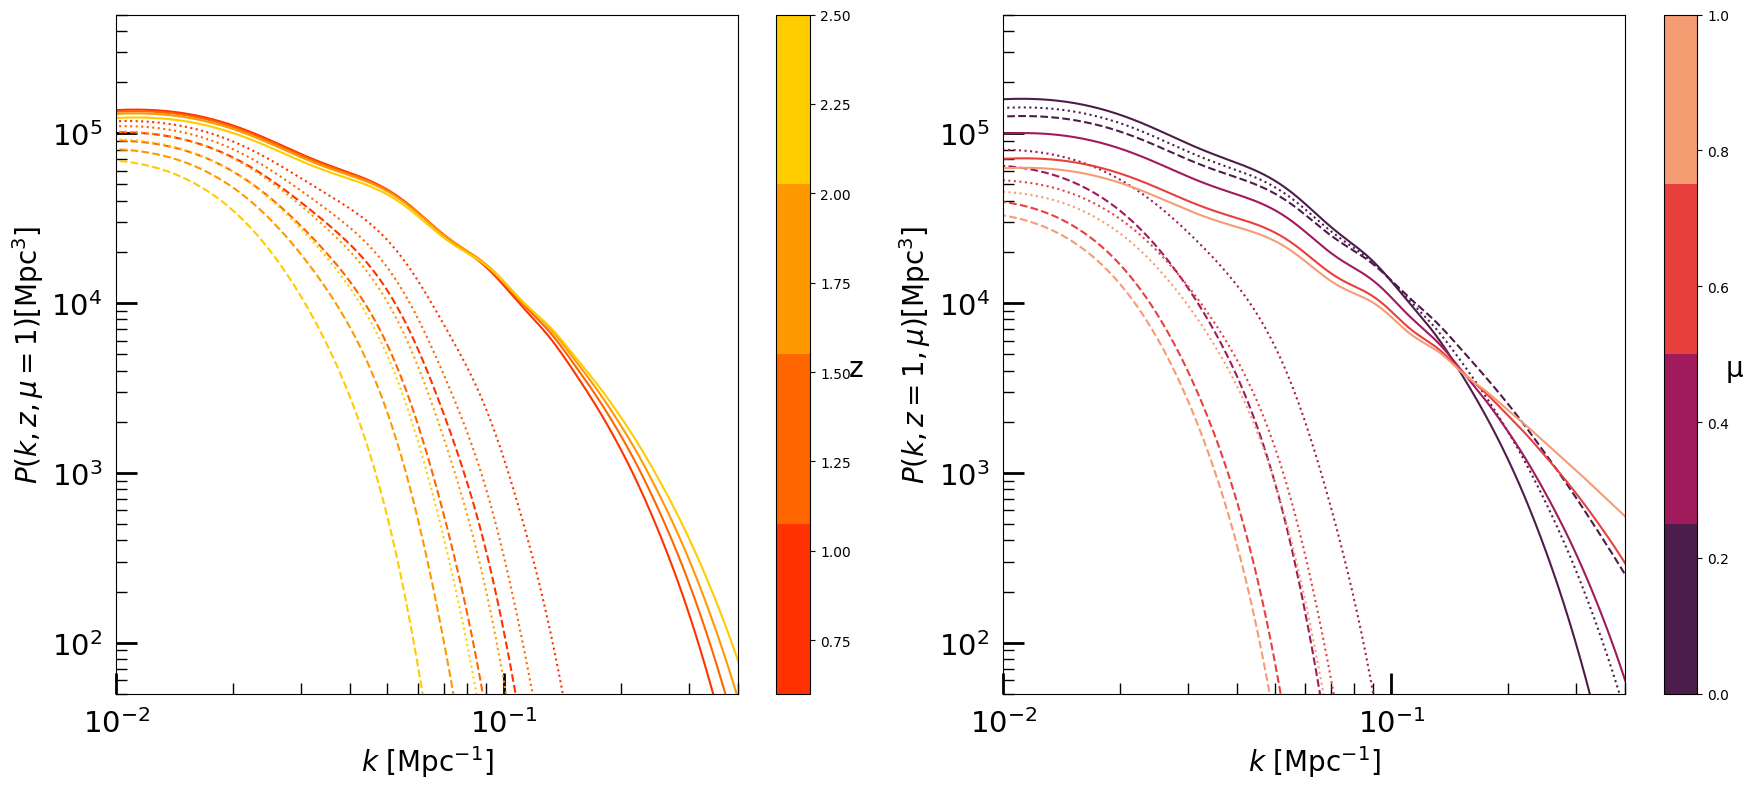

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))


zz1, zz2 = spectro_Pk.nuisance.sp_zbins_mids, spectro_Pk.nuisance.IM_zbins_mids

colormap_z = sns.color_palette("autumn", len(zz1))
colors_z = iter(colormap_z)
sm_z = plt.cm.ScalarMappable(cmap=ListedColormap(colormap_z), norm=plt.Normalize(vmin=zz.min(), vmax=zz.max()))
sm_z.set_array([])

muu = 0.9
for z1, z2 in zip(zz1, zz1): #at euclid redshifts
    c = next(colors_z)
    axs[0].loglog(kk, spectro_Pk.observed_Pgg(z1, kk, muu), c=c)
    axs[0].loglog(kk, spectro_Pk.observed_P_ij(z2, kk, muu, si='I', sj='I')/(spectro_Pk.Temperature(z2)**2), c=c, ls='--')
    axs[0].loglog(kk, spectro_Pk.observed_P_ij(z2, kk, muu, si='I', sj='g')/(spectro_Pk.Temperature(z2)), c=c, ls=':')


axs[0].set_xlabel(r"$k$ [$\mathrm{Mpc}^{-1}$]", fontsize=20)
axs[0].set_ylabel(r"$P(k,z,\mu=1)[\mathrm{Mpc}^3]$", fontsize=20)
axs[0].set_xlim([1e-2, 0.4])
axs[0].set_ylim([5*1e1, 5*1e5])
cbar_z = fig.colorbar(sm_z, ax=axs[0])
cbar_z.set_label('z', fontsize=20, rotation=0)

mus = np.linspace(1, 0, 4)
colormap_mu = sns.color_palette("rocket", len(mus))
colors_mu = iter(colormap_mu)
sm_mu = plt.cm.ScalarMappable(cmap=ListedColormap(colormap_mu), norm=plt.Normalize(vmin=mus.min(), vmax=mus.max()))
sm_mu.set_array([])

zzii = 1.0
for mu in mus:
    c = next(colors_mu)
    axs[1].loglog(kk, spectro_Pk.observed_Pgg(zzii, kk, mu), c=c, ls='-')
    axs[1].loglog(kk, spectro_Pk.observed_P_ij(zzii, kk, mu, si='I', sj='I')/(spectro_Pk.Temperature(zzii)**2), c=c, ls='--')
    axs[1].loglog(kk, spectro_Pk.observed_P_ij(zzii, kk, mu, si='I', sj='g')/(spectro_Pk.Temperature(zzii)), c=c, ls=':')

axs[1].set_xlabel(r"$k$ [$\mathrm{Mpc}^{-1}$]", fontsize=20)
axs[1].set_ylabel(r"$P(k,z=1,\mu)[\mathrm{Mpc}^3]$", fontsize=20)
axs[1].set_xlim([1e-2, 0.4])
axs[1].set_ylim([5*1e1, 5*1e5])
cbar_mu = fig.colorbar(sm_mu, ax=axs[1])
cbar_mu.set_label('μ', fontsize=20, rotation=0)

[ax.tick_params(which="major", length=15, width=2, direction="in") for ax in axs]
[ax.tick_params(which="minor", length=8, width=1, direction="in") for ax in axs]
[ax.minorticks_on() for ax in axs]
[ax.tick_params(axis="both", which="major", labelsize=21, pad=10) for ax in axs]
[ax.tick_params(axis="both", which="minor", labelsize=15) for ax in axs]
plt.tight_layout()
plt.show()

In [16]:
spectro_Pk.bias_samples

In [17]:
muu = 0.99
for z1, z2 in zip(zz1, zz2):
    print(f"P_gg at z={z1:.2f}: {spectro_Pk.observed_Pgg(z1, 0.01, muu)}")
    print(f"alt P_gg at z={z1:.2f}: {spectro_Pk.observed_P_ij(z1, 0.01, muu, si='g', sj='g')}")
    print(f"Temperature at z={z1:.2f}: {spectro_Pk.Temperature(z1)}")
    #print(f"P_HI at z={z1:.2f}: {spectro_Pk.observed_P_HI(z1, 0.01, muu)}")
    print(f"P_II/T^2 at z={z1:.2f}: {spectro_Pk.observed_P_ij(z1, 0.01, muu, si='I', sj='I')/(spectro_Pk.Temperature(z1)**2)}")
    print(f"P_Ig/T at z={z1:.2f}: {spectro_Pk.observed_P_ij(z1, 0.01, muu, si='I', sj='g')/(spectro_Pk.Temperature(z1))}")
    print("---")


P_gg at z=1.00: 156148.95289849714
alt P_gg at z=1.00: 156148.9528984971
Temperature at z=1.00: 0.17057226296774383
P_II/T^2 at z=1.00: [122668.29544108]
P_Ig/T at z=1.00: [138399.87675922]
---
P_gg at z=1.20: 151931.80323061428
alt P_gg at z=1.20: 151931.80323061428
Temperature at z=1.20: 0.1945642832619074
P_II/T^2 at z=1.20: [112041.61227681]
P_Ig/T at z=1.20: [130471.00900231]
---
P_gg at z=1.40: 146764.3695549119
alt P_gg at z=1.40: 146764.36955491186
Temperature at z=1.40: 0.21831147036593376
P_II/T^2 at z=1.40: [102386.47426379]
P_Ig/T at z=1.40: [122583.38527825]
---
P_gg at z=1.65: 138102.0875840003
alt P_gg at z=1.65: 138102.08758400028
Temperature at z=1.65: 0.247722511709818
P_II/T^2 at z=1.65: [91763.18536968]
P_Ig/T at z=1.65: [112573.0316857]
---


### Compare the Power Spectrum from two different cosmologies

In [18]:
print(f"Spectroscopic zbins mids: {spectro_Cov.z_bin_mids}")
print(f"Spectroscopic IM zbins mids: {spectro_Cov.IM_z_bin_mids}")
print(f"GC inter bins: {spectro_Cov.inter_z_bin_mids}")
print(f"GC global bins: {spectro_Cov.global_z_bin_mids}")

Spectroscopic zbins mids: [1.   1.2  1.4  1.65]
Spectroscopic IM zbins mids: [0.6  0.8  1.   1.2  1.4  1.65 1.9  2.1  2.3  2.5 ]
GC inter bins: [1.   1.2  1.4  1.65]
GC global bins: [0.6  0.8  1.   1.2  1.4  1.65 1.9  2.1  2.3  2.5 ]


In [19]:
observables = ["IM"]
cosmoFM_I = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    observables=observables,
    cosmoModel=options["cosmo_model"],
    surveyName=options["survey_name"],
)
fish_mat_I = cosmoFM_I.compute()

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************

  -> Survey loaded:  SKAO-IM-Redbook

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic-sigma_pv

  -> No photo survey passed, returning empty dict

  -> Survey loaded:  False

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   0.11 s

In class: FisherMatrix  ----> Computing Pk-spectro Fisher matrix
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: derivatives  Derivative on Omegam done! in :  0.39 s

  +++ Computing derivative on Omegab

In c

In [20]:
observables = ["GCsp", "IM"]
cosmoFM_Ig = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    observables=observables,
    cosmoModel=options["cosmo_model"],
    surveyName=options["survey_name"],
)
fish_mat_Ig = cosmoFM_Ig.compute()

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************

  -> Survey loaded:  SKAO-IM-Redbook

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic-sigma_pv

  -> No photo survey passed, returning empty dict

  -> Survey loaded:  False

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   0.14 s

In class: FisherMatrix  ----> Computing Pk-spectro Fisher matrix
Entering veff_XC term
Entering veff_XC term
Entering veff_XC term
Entering veff_XC term
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: derivati

In [21]:
spectro_Pk_Ig = spobs.ComputeGalSpectro(cosmoFM_Ig.fiducialcosmopars, 
                                        configuration=cosmoFM_Ig)
spectro_Cov_Ig = spcov.SpectroCov(cosmoFM_Ig.fiducialcosmopars, 
                               fiducial_specobs=spectro_Pk_Ig,
                               configuration=cosmoFM_Ig)

In [22]:
observables = ["GCsp"]
cosmoFM_g = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    observables=observables,
    cosmoModel=options["cosmo_model"],
    surveyName=options["survey_name"],
)
fish_mat_g = cosmoFM_g.compute()

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************

  -> Survey loaded:  SKAO-IM-Redbook

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic-sigma_pv

  -> No photo survey passed, returning empty dict

  -> Survey loaded:  False

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   0.14 s

In class: FisherMatrix  ----> Computing Pk-spectro Fisher matrix
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: derivatives  Derivative on Omegam done! in :  0.29 s

  +++ Computing derivative on Omegab

In c

In [23]:
params_Ig = fish_mat_Ig.get_param_names()
print(params_Ig)
params_Ig_tex = fish_mat_Ig.get_param_names_latex()
#print(params_Ig_tex)

['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'lnbg_1', 'lnbg_2', 'lnbg_3', 'lnbg_4', 'bI_c1', 'bI_c2']


In [24]:
params_I = fish_mat_I.get_param_names()
print(params_I)
params_I_tex = fish_mat_I.get_param_names_latex()
#print(params_I_tex)
params_g = fish_mat_g.get_param_names()
print(params_g)
params_g_tex = fish_mat_g.get_param_names_latex()
#print(params_g_tex)

['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'bI_c1', 'bI_c2']
['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'lnbg_1', 'lnbg_2', 'lnbg_3', 'lnbg_4']


In [25]:
print(f"fish_mat_Ig shape: {fish_mat_Ig.get_fisher_matrix().shape}")
print(f"fish_mat_I shape: {fish_mat_I.get_fisher_matrix().shape}")
print(f"fish_mat_g shape: {fish_mat_g.get_fisher_matrix().shape}")

fish_mat_Ig shape: (11, 11)
fish_mat_I shape: (7, 7)
fish_mat_g shape: (9, 9)


In [26]:
from cosmicfishpie.analysis.fishconsumer import simple_fisher_plot
from cosmicfishpie.analysis.fishconsumer import fishtable_to_pandas

In [27]:
fish_mat_all = fish_mat_Ig + fish_mat_I + fish_mat_g
fish_mat_all.get_param_names()

['Omegam',
 'Omegab',
 'h',
 'ns',
 'sigma8',
 'lnbg_1',
 'lnbg_2',
 'lnbg_3',
 'lnbg_4',
 'bI_c1',
 'bI_c2']

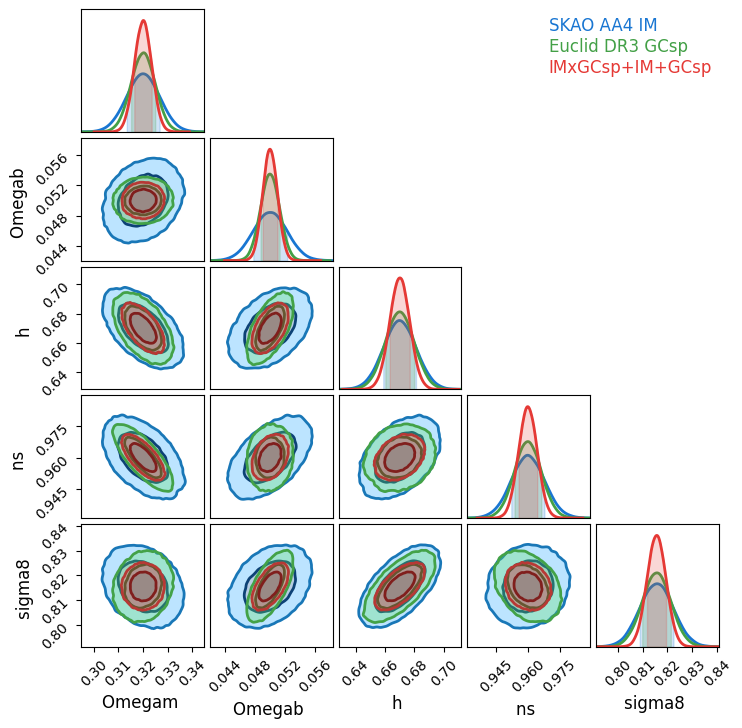

In [29]:
# Example usage
#fisher_matrices = [fish_mat_Ig, fish_mat_I, fish_mat_g, fish_mat_all]  # Your Fisher matrix objects
fisher_matrices = [fish_mat_I, fish_mat_g, fish_mat_all]  # Your Fisher matrix objects
params = params_I[:5]   # Parameters to plot
#labels = ['SKAO IM', 'Euclid GCsp', 'IMxGCsp','IMxGCsp+IM+GCsp']           # Optional labels
labels = ['SKAO AA4 IM', 'Euclid DR3 GCsp', 'IMxGCsp+IM+GCsp']           # Optional labels
#colors = ['orange', 'blue', 'green', 'red']             # Optional colors
colors = ['blue', 'green', 'red']             # Optional colors

fig = simple_fisher_plot(
    fisher_matrices,
    params,
    labels=labels,
    colors=colors,
    n_samples=10000,
    legend=True,
    #save_plot=True,
    output_file='my_fisher_plot.pdf'
)

In [30]:
import cosmicfishpie.analysis.fisher_plot_analysis as fpa
import cosmicfishpie.analysis.fisher_operations as fo
cfanaly = fpa.CosmicFish_FisherAnalysis(fisher_list=[fish_mat_I, fish_mat_g, fish_mat_all])
fishlist = cfanaly.get_fisher_list()
fishlist

In [31]:
params

['Omegam', 'Omegab', 'h', 'ns', 'sigma8']

In [32]:
pd = fishtable_to_pandas(params, cfanaly)

In [33]:
for ii, fish in enumerate(fishlist):
    print("----")
    print("Old Fisher Name: ", fish.name)
    fish.name = labels[ii]
    print("New Fisher Name: ", fish.name)
    sigmas = fish.get_confidence_bounds()
    fidus = fish.get_param_fiducial()
    parnames = fish.get_param_names()
    #fiww = fo.marginalise(fish, parstomarg)
    #deFoM = np.sqrt(fiww.determinant())
    #print("Fisher FoM: ", deFoM)
    for ii, par in enumerate(parnames):
        print("Parameter {:s},  fiducial: {:.3f}, 1-sigma error: {:.4f}, percent error: {:.1f}%".format(
            par, fidus[ii], abs(sigmas[ii]), abs(100*sigmas[ii]/fidus[ii])))

----
Old Fisher Name:  CosmicFish_v1.2.0_GCsp_presentation_IM_fishermatrix
New Fisher Name:  SKAO AA4 IM
Parameter Omegam,  fiducial: 0.320, 1-sigma error: 0.0066, percent error: 2.1%
Parameter Omegab,  fiducial: 0.050, 1-sigma error: 0.0022, percent error: 4.5%
Parameter h,  fiducial: 0.670, 1-sigma error: 0.0110, percent error: 1.6%
Parameter ns,  fiducial: 0.960, 1-sigma error: 0.0078, percent error: 0.8%
Parameter sigma8,  fiducial: 0.816, 1-sigma error: 0.0067, percent error: 0.8%
Parameter bI_c1,  fiducial: 0.300, 1-sigma error: 0.0070, percent error: 2.3%
Parameter bI_c2,  fiducial: 0.600, 1-sigma error: 0.0093, percent error: 1.5%
----
Old Fisher Name:  CosmicFish_v1.2.0_GCsp_presentation_GCsp_fishermatrix
New Fisher Name:  Euclid DR3 GCsp
Parameter Omegam,  fiducial: 0.320, 1-sigma error: 0.0049, percent error: 1.5%
Parameter Omegab,  fiducial: 0.050, 1-sigma error: 0.0012, percent error: 2.5%
Parameter h,  fiducial: 0.670, 1-sigma error: 0.0097, percent error: 1.5%
Parameter 

In [34]:
fishlist

In [38]:
import cosmicfishpie.analysis.fisher_plotting as fplt

In [43]:
plot_options = {'fishers_list': [fish_mat_all, fish_mat_I, fish_mat_g], 
                'colors': snscolors,
                'fish_labels': ['IMxGCsp+IM+GCsp', 'SKAO IM', 'Euclid DR3 GCsp'],
                'filled': False,
                'plot_pars': parnames[:5],
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'SKAO-Euclid_IM-GCsp'  ## file name root for all the plots, extra names can be added individually
                } 


fish_plotter = fplt.fisher_plotting(**plot_options)

./plots  exists already
Fisher matrix loaded, label name:  IMxGCsp+IM+GCsp
Fisher matrix loaded, label name:  SKAO IM
Fisher matrix loaded, label name:  Euclid DR3 GCsp


('Fishers names: ', ['IMxGCsp+IM+GCsp', 'SKAO IM', 'Euclid DR3 GCsp'])
('parameters to plot: ', ['Omegam', 'Omegab', 'h', 'ns', 'sigma8'])
X tick labels ---> :   ['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0}', 'h', 'n_{\\rm s}', '\\sigma_8']


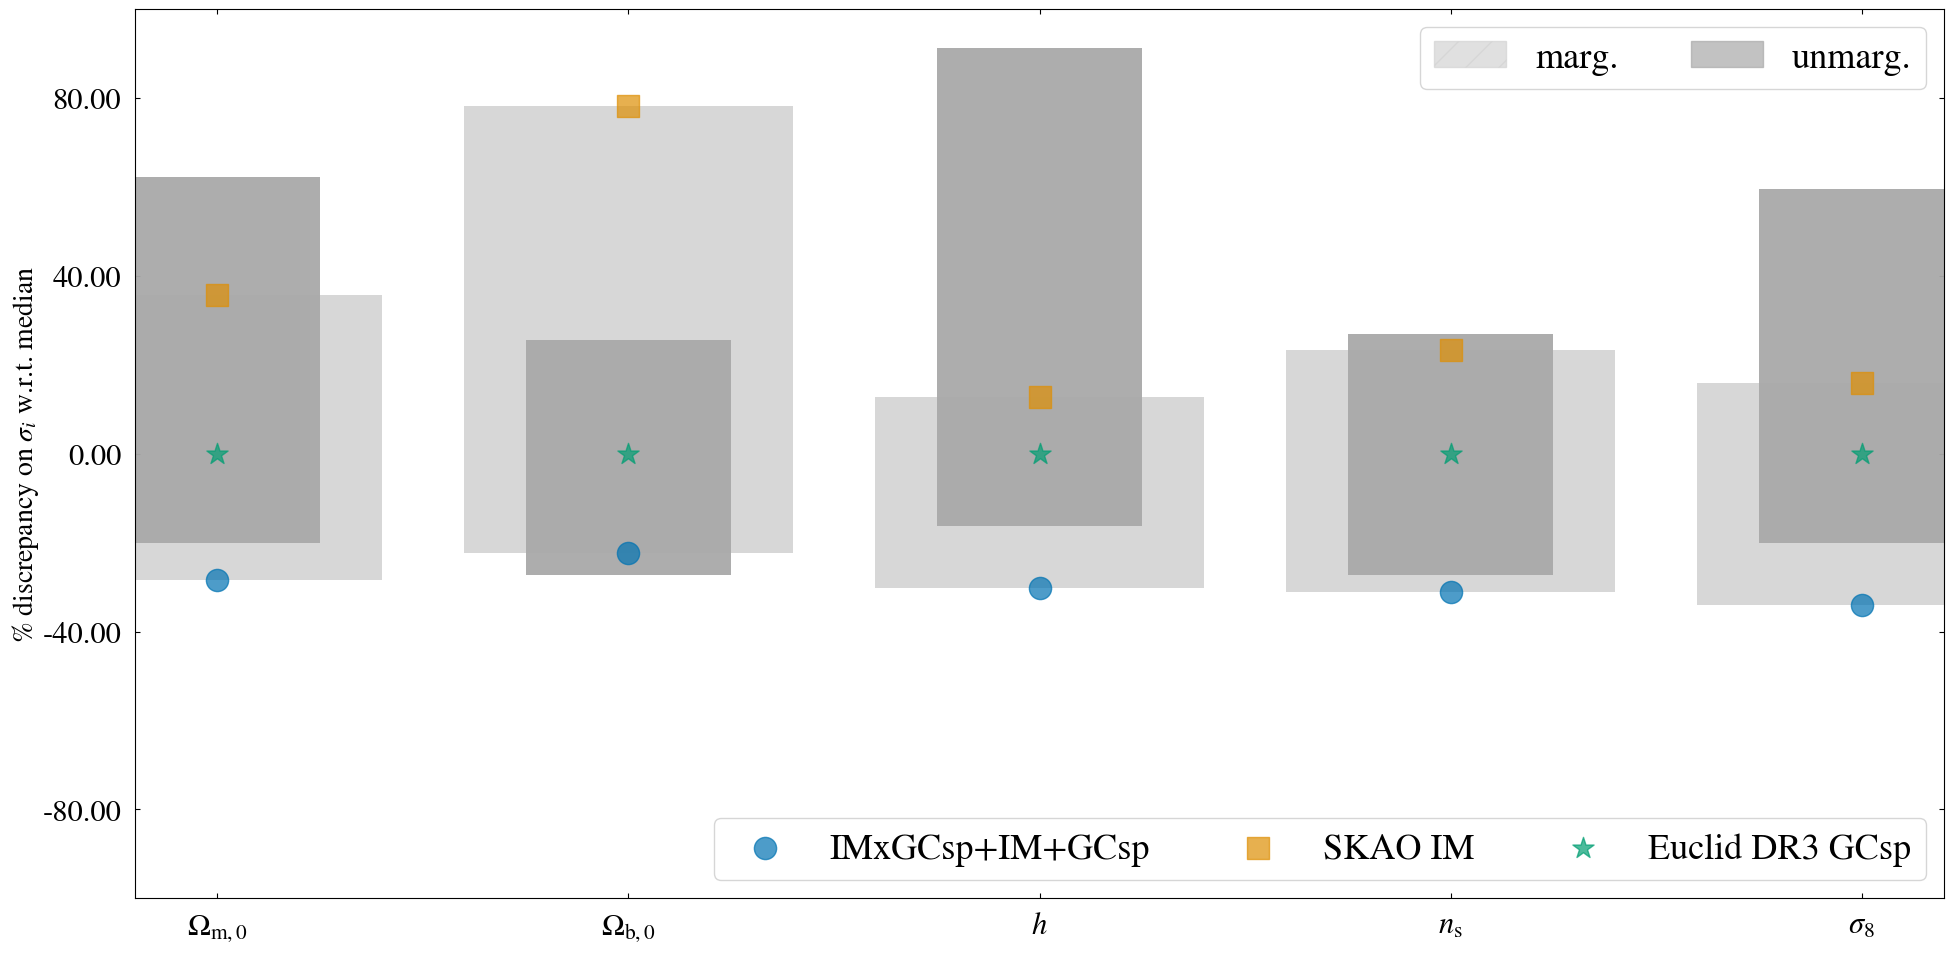

In [46]:
fish_plotter.compare_errors({'yrang':[-100, 100], 'compare_to_index': 2})